# Тема “Обучение без учителя”

#### Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.

In [5]:
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)

In [6]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [25]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
target = boston.target

In [8]:
y = pd.DataFrame(target, columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [26]:
y.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [14]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

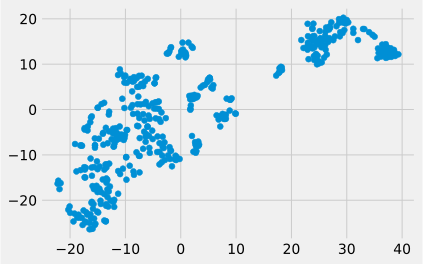

In [16]:
plt.style.use('fivethirtyeight')

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [20]:
X_train_labels = model.fit_predict(X_train_scaled)

print(X_train_labels)

[1 0 2 1 0 0 0 2 1 1 0 0 0 1 0 0 0 2 0 2 1 0 2 0 2 0 1 2 0 2 0 0 1 1 0 2 2
 0 0 2 2 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 2 0 1 1 1 1 2 0 1 1 1 2 1 0 0 1 1 2 2 0 1 1 0 1 0 2 2 2 0 0 2 0 0 0 1
 2 0 2 2 1 1 1 0 0 0 1 1 0 2 1 1 2 2 1 2 0 0 0 0 1 0 2 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 2 0 2 1 1 1 1 1 2 0 1 0 1 2 2 0 2 0 0 2 2 1 2 2 1 1 2 0 0 0 1 0 1
 1 2 2 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0 1 0 1 2 1 0 1 1 1
 1 0 0 2 2 0 2 0 1 0 0 0 0 0 1 1 2 0 0 2 2 1 1 0 2 1 1 0 2 2 1 0 2 1 0 0 1
 0 1 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 1 1 2 1 0 1 0 0 1 2 2 0 1 2 1 1 1 0
 2 1 0 0 0 0 0 0 1 2 0 1 2 2 0 2 0 2 0 1 2 0 0 0 2 1 0 1 1 0 1 2 0 0 1 0 1
 1 0 0 1 2 0 0 2 0 0 0 1 0 0 0 0 1 0 1 0 2 2 1 2 1 0 1 2 0 1 2 0 2 0 2 0 2
 0 0 1 0 2 1 2 1 0 1 2 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 2 0 0 0 2 1 0]


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

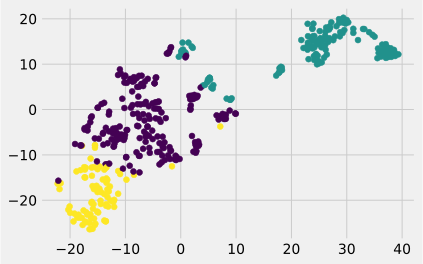

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)


plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

0-й кластер

In [23]:
y_train[X_train_labels == 0].mean()

price    24.958115
dtype: float64

In [27]:
X_train.loc[X_train_labels == 0,'CRIM'].mean()

0.42166020942408367

1-й кластер

In [28]:
y_train[X_train_labels == 1].mean()

price    16.165354
dtype: float64

In [29]:
X_train.loc[X_train_labels == 1,'CRIM'].mean()

10.797028425196853

2-й кластер

In [30]:
y_train[X_train_labels == 2].mean()

price    27.788372
dtype: float64

In [32]:
X_train.loc[X_train_labels == 2,'CRIM'].mean()

0.07356558139534886

#### *Задание 3


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [43]:
X_test_labels = model.fit_predict(X_test_scaled)

0-й кластер

In [44]:
y_test[X_test_labels == 0].mean()

price    16.710526
dtype: float64

In [45]:
X_test.loc[X_test_labels == 0,'CRIM'].mean()

9.419181842105264

1-й кластер

In [46]:
y_test[X_test_labels == 1].mean()

price    21.652
dtype: float64

In [47]:
X_test.loc[X_test_labels == 1,'CRIM'].mean()

0.2244212

2-й кластер

In [48]:
y_test[X_test_labels == 2].mean()

price    33.871429
dtype: float64

In [50]:
X_test.loc[X_test_labels == 2,'CRIM'].mean()

0.08618571428571427